# Tabular Data EDA: Imputation
Erica Landreth

Fitness Test | Multiclass or Binary | Accuracy | Loss | Accuracy (imputed data) | Loss (imputed data)
-|-|-|-|-|-
 Children's Global Assessment Scale | Multi | 0.567 | 1.229 | |
 Children's Global Assessment Scale | Binary | 0.567 | 0.827 | |
 Physical Measures | Multi | 0.437 | 1.102 | 0.599 | 1.426?
 Physical Measures | Binary | 0.564 | 0.732 | 0.604 | 0.750?
 Fitness Endurance | Multi | 0.716 | 0.838 | |
 Fitness Endurance | Binary | 0.564 | 0.732 | |
 FitnessGram | Multi | 0.339 | 1.489  | |
 FitnessGram | Binary | 0.405 | 0.902 | |
 Bio-electric Impedance | Multi |  |  | 0.604 | 8.154?
 Bio-electric Impedance | Binary |  |  | 0.604 | 2.115?
 Physical Activity | Multi |  |  | |
 Physical Activity | Binary |  | | |
 Internet Addiction | Multi | 0.430 | 0.971 | |
 Internet Addiction | Binary | 0.404 | 0.902 | |
 Sleep Disturbance Scale | Multi | 0.572 | 1.069 | |
 Sleep Disturbance Scale | Binary | 0.572 | 0.839 | |

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
import itertools

In [53]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.11.0


In [54]:
data_dir = os.path.abspath(os.path.join('..', 'data'))
data = pd.read_csv(os.path.join(data_dir,'train.csv'))
data_dict = pd.read_csv(os.path.join(data_dir,'data_dictionary.csv'))


In [55]:
data_dict

,Instrument,Field,Description,Type,Values,Value Labels
0,Identifier,id,Participant's ID,str,NaN,NaN
1,Demographics,Basic_Demos-Enroll_Season,Season of enrollment,str,"Spring, Summer, Fall, Winter",NaN
2,Demographics,Basic_Demos-Age,Age of participant,float,NaN,NaN
3,Demographics,Basic_Demos-Sex,Sex of participant,categorical int,"0,1","0=Male, 1=Female"
4,Children's Global Assessment Scale,CGAS-Season,Season of participation,str,"Spring, Summer, Fall, Winter",NaN
...,...,...,...,...,...,...
76,Sleep Disturbance Scale,SDS-Season,Season of participation,str,"Spring, Summer, Fall, Winter",NaN
77,Sleep Disturbance Scale,SDS-SDS_Total_Raw,Total Raw Score,int,NaN,NaN
78,Sleep Disturbance Scale,SDS-SDS_Total_T,Total T-Score,int,NaN,NaN
79,Internet Use,PreInt_EduHx-Season,Season of participation,str,"Spring, Summer, Fall, Winter",NaN


In [56]:
data

,id,Basic_Demos-Enroll_Season,Basic_Demos-Age,Basic_Demos-Sex,CGAS-Season,CGAS-CGAS_Score,Physical-Season,Physical-BMI,Physical-Height,Physical-Weight,...,PCIAT-PCIAT_18,PCIAT-PCIAT_19,PCIAT-PCIAT_20,PCIAT-PCIAT_Total,SDS-Season,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-Season,PreInt_EduHx-computerinternet_hoursday,sii
0,00008ff9,Fall,5,0,Winter,51.0,Fall,16.877316,46.0,50.8,...,4.0,2.0,4.0,55.0,NaN,NaN,NaN,Fall,3.0,2.0
1,000fd460,Summer,9,0,NaN,NaN,Fall,14.035590,48.0,46.0,...,0.0,0.0,0.0,0.0,Fall,46.0,64.0,Summer,0.0,0.0
2,00105258,Summer,10,1,Fall,71.0,Fall,16.648696,56.5,75.6,...,2.0,1.0,1.0,28.0,Fall,38.0,54.0,Summer,2.0,0.0
3,00115b9f,Winter,9,0,Fall,71.0,Summer,18.292347,56.0,81.6,...,3.0,4.0,1.0,44.0,Summer,31.0,45.0,Winter,0.0,1.0
4,0016bb22,Spring,18,1,Summer,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3955,ff8a2de4,Fall,13,0,Spring,60.0,Fall,16.362460,59.5,82.4,...,1.0,1.0,0.0,32.0,Winter,35.0,50.0,Fall,1.0,1.0
3956,ffa9794a,Winter,10,0,NaN,NaN,Spring,18.764678,53.5,76.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Winter,0.0,NaN
3957,ffcd4dbd,Fall,11,0,Spring,68.0,Winter,21.441500,60.0,109.8,...,1.0,0.0,1.0,31.0,Winter,56.0,77.0,Fall,0.0,1.0
3958,ffed1dd5,Spring,13,0,Spring,70.0,Winter,12.235895,70.7,87.0,...,1.0,1.0,1.0,19.0,Spring,33.0,47.0,Spring,1.0,0.0


In [57]:
sii = data.loc[:,'sii']

### Data Imputation

Start with rows that are not missing PCIAT/SII info, and filter out those columns.

Also not super interested in imputing seasons.

In [58]:
data.dropna(subset='sii',inplace=True)
for col in data.columns:
    if 'PCIAT' in col or 'Season' in col:
        data.drop(col,axis=1,inplace=True)

In [59]:
data.head()

,id,Basic_Demos-Age,Basic_Demos-Sex,CGAS-CGAS_Score,Physical-BMI,Physical-Height,Physical-Weight,Physical-Waist_Circumference,Physical-Diastolic_BP,Physical-HeartRate,...,BIA-BIA_LDM,BIA-BIA_LST,BIA-BIA_SMM,BIA-BIA_TBW,PAQ_A-PAQ_A_Total,PAQ_C-PAQ_C_Total,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-computerinternet_hoursday,sii
0,00008ff9,5,0,51.0,16.877316,46.0,50.8,NaN,NaN,NaN,...,8.89536,38.9177,19.5413,32.6909,NaN,NaN,NaN,NaN,3.0,2.0
1,000fd460,9,0,NaN,14.035590,48.0,46.0,22.0,75.0,70.0,...,14.97400,39.4497,15.4107,27.0552,NaN,2.340,46.0,64.0,0.0,0.0
2,00105258,10,1,71.0,16.648696,56.5,75.6,NaN,65.0,94.0,...,NaN,NaN,NaN,NaN,NaN,2.170,38.0,54.0,2.0,0.0
3,00115b9f,9,0,71.0,18.292347,56.0,81.6,NaN,60.0,97.0,...,16.77900,58.9338,26.4798,45.9966,NaN,2.451,31.0,45.0,0.0,1.0
5,001f3379,13,1,50.0,22.279952,59.5,112.2,NaN,60.0,73.0,...,20.90200,79.6982,35.3804,63.1265,NaN,4.110,40.0,56.0,0.0,1.0


In [60]:
is_missing = data.isna().sum(axis=0).to_frame()
is_missing
# is_missing.to_csv('is_missing.csv')

,0
id,0
Basic_Demos-Age,0
Basic_Demos-Sex,0
CGAS-CGAS_Score,394
Physical-BMI,209
Physical-Height,206
Physical-Weight,164
Physical-Waist_Circumference,2253
Physical-Diastolic_BP,258
Physical-HeartRate,250


**PAQ: Seems like only adult or child field will be filled in. So combine them.**

In [61]:
data['PAQ'] = data['PAQ_A-PAQ_A_Total'].fillna(data['PAQ_C-PAQ_C_Total'])
data.drop('PAQ_A-PAQ_A_Total',axis=1,inplace=True)
data.drop('PAQ_C-PAQ_C_Total',axis=1,inplace=True)

**Physical: height/weight info probably not as informative as BMI, so use that instead. Also, can fill from BIA BMI if stil missing.**

In [62]:
data.head()

,id,Basic_Demos-Age,Basic_Demos-Sex,CGAS-CGAS_Score,Physical-BMI,Physical-Height,Physical-Weight,Physical-Waist_Circumference,Physical-Diastolic_BP,Physical-HeartRate,...,BIA-BIA_ICW,BIA-BIA_LDM,BIA-BIA_LST,BIA-BIA_SMM,BIA-BIA_TBW,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-computerinternet_hoursday,sii,PAQ
0,00008ff9,5,0,51.0,16.877316,46.0,50.8,NaN,NaN,NaN,...,24.4349,8.89536,38.9177,19.5413,32.6909,NaN,NaN,3.0,2.0,NaN
1,000fd460,9,0,NaN,14.035590,48.0,46.0,22.0,75.0,70.0,...,21.0352,14.97400,39.4497,15.4107,27.0552,46.0,64.0,0.0,0.0,2.340
2,00105258,10,1,71.0,16.648696,56.5,75.6,NaN,65.0,94.0,...,NaN,NaN,NaN,NaN,NaN,38.0,54.0,2.0,0.0,2.170
3,00115b9f,9,0,71.0,18.292347,56.0,81.6,NaN,60.0,97.0,...,30.4041,16.77900,58.9338,26.4798,45.9966,31.0,45.0,0.0,1.0,2.451
5,001f3379,13,1,50.0,22.279952,59.5,112.2,NaN,60.0,73.0,...,32.9141,20.90200,79.6982,35.3804,63.1265,40.0,56.0,0.0,1.0,4.110


In [63]:
data['calc-BMI'] = data['Physical-Weight']*0.453592 / (data['Physical-Height']*0.0254)**2
                        #weight kg/height m squared
data['Physical-BMI'] = data['Physical-BMI'].fillna(data['calc-BMI'])
data['Physical-BMI'] = data['Physical-BMI'].fillna(data['BIA-BIA_BMI'])

# and fill the other way around too
data['BIA-BIA_BMI'] = data['BIA-BIA_BMI'].fillna(data['Physical-BMI'])

data.drop('Physical-Height',axis=1,inplace=True)
data.drop('Physical-Weight',axis=1,inplace=True)
data.drop('calc-BMI',axis=1,inplace=True)


**FitnessGram: Zones are derived from values and age. Can either fill in zones from these other fields, or drop entirely, since this is somewhat redundant info, and tends to be missing more often than the value itself.**

**Or maybe, instead of zones (which tend to take only 2-3 values), create some sort of "age-adjusted" value column, which takes into account age, but is more descriptive than zone**

In [64]:
# base = ['CU','GSND','GSD','PU','SRL','SRR','TL']
# for b in base:
#     f1 = f'FGC-FGC_{b}'
#     f2 = f1+'_Zone'
#     fig,ax = plt.subplots(1,1)
#     ax.scatter(f1,f2,c='Basic_Demos-Age',data=data,alpha=0.1)
#     ax.set_xlabel(f'{b} Value')
#     ax.set_ylabel(f'{b} Zone')
#     ax.set_title('Colored by age')
#     plt.show()

For now, for the sake of simplicity, assume it's ok to remove the zone fields.

In [65]:
[col for col in data.columns if '_Zone' in col]

['FGC-FGC_CU_Zone',
 'FGC-FGC_GSND_Zone',
 'FGC-FGC_GSD_Zone',
 'FGC-FGC_PU_Zone',
 'FGC-FGC_SRL_Zone',
 'FGC-FGC_SRR_Zone',
 'FGC-FGC_TL_Zone']

In [66]:
data.drop([col for col in data.columns if '_Zone' in col],axis=1,inplace=True)

In [67]:
data

,id,Basic_Demos-Age,Basic_Demos-Sex,CGAS-CGAS_Score,Physical-BMI,Physical-Waist_Circumference,Physical-Diastolic_BP,Physical-HeartRate,Physical-Systolic_BP,Fitness_Endurance-Max_Stage,...,BIA-BIA_ICW,BIA-BIA_LDM,BIA-BIA_LST,BIA-BIA_SMM,BIA-BIA_TBW,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-computerinternet_hoursday,sii,PAQ
0,00008ff9,5,0,51.0,16.877316,NaN,NaN,NaN,NaN,NaN,...,24.4349,8.89536,38.9177,19.5413,32.6909,NaN,NaN,3.0,2.0,NaN
1,000fd460,9,0,NaN,14.035590,22.0,75.0,70.0,122.0,NaN,...,21.0352,14.97400,39.4497,15.4107,27.0552,46.0,64.0,0.0,0.0,2.340
2,00105258,10,1,71.0,16.648696,NaN,65.0,94.0,117.0,5.0,...,NaN,NaN,NaN,NaN,NaN,38.0,54.0,2.0,0.0,2.170
3,00115b9f,9,0,71.0,18.292347,NaN,60.0,97.0,117.0,6.0,...,30.4041,16.77900,58.9338,26.4798,45.9966,31.0,45.0,0.0,1.0,2.451
5,001f3379,13,1,50.0,22.279952,NaN,60.0,73.0,102.0,NaN,...,32.9141,20.90200,79.6982,35.3804,63.1265,40.0,56.0,0.0,1.0,4.110
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3953,ff6c2bb8,8,0,NaN,17.139810,25.0,60.0,65.0,112.0,NaN,...,25.7118,15.81500,49.3301,20.2645,36.7181,41.0,58.0,2.0,0.0,3.440
3954,ff759544,7,1,NaN,13.927006,23.0,65.0,75.0,105.0,NaN,...,20.0572,15.14000,42.8185,18.0937,30.0453,48.0,67.0,0.0,1.0,NaN
3955,ff8a2de4,13,0,60.0,16.362460,NaN,71.0,70.0,104.0,NaN,...,33.3709,17.97970,66.2889,29.7790,52.8320,35.0,50.0,1.0,1.0,3.260
3957,ffcd4dbd,11,0,68.0,21.441500,NaN,79.0,99.0,116.0,NaN,...,33.9805,21.34030,71.3903,28.7792,54.4630,56.0,77.0,0.0,1.0,2.729


In [68]:
is_missing = data.isna().mean(axis=0).to_frame().sort_values(by=0,ascending=False)
is_missing
# below: proportion of data missing each field

# NOTE: Probably a good idea to not use fields that are hardly ever populated,
# but we'll try to impute them nonetheless

,0
Physical-Waist_Circumference,0.823465
Fitness_Endurance-Time_Mins,0.733918
Fitness_Endurance-Time_Sec,0.733918
Fitness_Endurance-Max_Stage,0.732822
FGC-FGC_GSD,0.681652
FGC-FGC_GSND,0.681287
PAQ,0.341374
BIA-BIA_ICW,0.337354
BIA-BIA_Frame_num,0.337354
BIA-BIA_LDM,0.337354


In [69]:
data.drop(list(is_missing[is_missing > 0.5].dropna().index),axis=1,inplace=True)

### Outliers

A lot of the BIA features have ridiculous outliers... let's take care of those

In [70]:
data['BIA-BIA_BMC'] = data['BIA-BIA_BMC'].mask(data['BIA-BIA_BMC'] > 20, pd.NA)
data['BIA-BIA_BMR'] = data['BIA-BIA_BMR'].mask(data['BIA-BIA_BMR'] > 2500, pd.NA)
data['BIA-BIA_DEE'] = data['BIA-BIA_DEE'].mask(data['BIA-BIA_DEE'] > 4000, pd.NA)
data['BIA-BIA_ECW'] = data['BIA-BIA_ECW'].mask(data['BIA-BIA_ECW'] > 80, pd.NA)
data['BIA-BIA_FFM'] = data['BIA-BIA_FFM'].mask(data['BIA-BIA_FFM'] > 200, pd.NA)
data['BIA-BIA_FFMI'] = data['BIA-BIA_FFMI'].mask(data['BIA-BIA_FFMI'] > 25, pd.NA)
data['BIA-BIA_FMI'] = data['BIA-BIA_FMI'].mask(data['BIA-BIA_FMI'] < 0, pd.NA)
data['BIA-BIA_Fat'] = data['BIA-BIA_Fat'].mask(data['BIA-BIA_Fat'] < 0, pd.NA)
data['BIA-BIA_Fat'] = data['BIA-BIA_Fat'].mask(data['BIA-BIA_Fat'] > 100, pd.NA)
data['BIA-BIA_ICW'] = data['BIA-BIA_ICW'].mask(data['BIA-BIA_ICW'] > 100, pd.NA)
data['BIA-BIA_LDM'] = data['BIA-BIA_LDM'].mask(data['BIA-BIA_LDM'] > 50, pd.NA)
data['BIA-BIA_LST'] = data['BIA-BIA_LST'].mask(data['BIA-BIA_LST'] > 150, pd.NA)
data['BIA-BIA_SMM'] = data['BIA-BIA_SMM'].mask(data['BIA-BIA_SMM'] > 100, pd.NA)
data['BIA-BIA_TBW'] = data['BIA-BIA_TBW'].mask(data['BIA-BIA_TBW'] > 125, pd.NA)

### KNN Imputation

In [71]:
# define column groups

cols = list(data.columns)
col_groups = {}

tests = ["Basic_Demos","CGAS","Physical","Fitness_Endurance","FGC","BIA","PAQ","SDS","PreInt"]
for test in tests:
    col_groups[test] = [col for col in data.columns if test in col]

print(col_groups)

feat_cols = list(itertools.chain.from_iterable(col_groups.values()))
print(feat_cols)

{'Basic_Demos': ['Basic_Demos-Age', 'Basic_Demos-Sex'], 'CGAS': ['CGAS-CGAS_Score'], 'Physical': ['Physical-BMI', 'Physical-Diastolic_BP', 'Physical-HeartRate', 'Physical-Systolic_BP'], 'Fitness_Endurance': [], 'FGC': ['FGC-FGC_CU', 'FGC-FGC_PU', 'FGC-FGC_SRL', 'FGC-FGC_SRR', 'FGC-FGC_TL'], 'BIA': ['BIA-BIA_Activity_Level_num', 'BIA-BIA_BMC', 'BIA-BIA_BMI', 'BIA-BIA_BMR', 'BIA-BIA_DEE', 'BIA-BIA_ECW', 'BIA-BIA_FFM', 'BIA-BIA_FFMI', 'BIA-BIA_FMI', 'BIA-BIA_Fat', 'BIA-BIA_Frame_num', 'BIA-BIA_ICW', 'BIA-BIA_LDM', 'BIA-BIA_LST', 'BIA-BIA_SMM', 'BIA-BIA_TBW'], 'PAQ': ['PAQ'], 'SDS': ['SDS-SDS_Total_Raw', 'SDS-SDS_Total_T'], 'PreInt': ['PreInt_EduHx-computerinternet_hoursday']}
['Basic_Demos-Age', 'Basic_Demos-Sex', 'CGAS-CGAS_Score', 'Physical-BMI', 'Physical-Diastolic_BP', 'Physical-HeartRate', 'Physical-Systolic_BP', 'FGC-FGC_CU', 'FGC-FGC_PU', 'FGC-FGC_SRL', 'FGC-FGC_SRR', 'FGC-FGC_TL', 'BIA-BIA_Activity_Level_num', 'BIA-BIA_BMC', 'BIA-BIA_BMI', 'BIA-BIA_BMR', 'BIA-BIA_DEE', 'BIA-BIA_EC

Since the holes vary so much from record to record, going to brute force it for now and loop through all columns for all records. TODO: think about a more clever way to do this

In [72]:
data.reset_index(inplace=True,drop=True)
data

,id,Basic_Demos-Age,Basic_Demos-Sex,CGAS-CGAS_Score,Physical-BMI,Physical-Diastolic_BP,Physical-HeartRate,Physical-Systolic_BP,FGC-FGC_CU,FGC-FGC_PU,...,BIA-BIA_ICW,BIA-BIA_LDM,BIA-BIA_LST,BIA-BIA_SMM,BIA-BIA_TBW,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-computerinternet_hoursday,sii,PAQ
0,00008ff9,5,0,51.0,16.877316,NaN,NaN,NaN,0.0,0.0,...,24.4349,8.89536,38.9177,19.5413,32.6909,NaN,NaN,3.0,2.0,NaN
1,000fd460,9,0,NaN,14.035590,75.0,70.0,122.0,3.0,5.0,...,21.0352,14.97400,39.4497,15.4107,27.0552,46.0,64.0,0.0,0.0,2.340
2,00105258,10,1,71.0,16.648696,65.0,94.0,117.0,20.0,7.0,...,NaN,NaN,NaN,NaN,NaN,38.0,54.0,2.0,0.0,2.170
3,00115b9f,9,0,71.0,18.292347,60.0,97.0,117.0,18.0,5.0,...,30.4041,16.77900,58.9338,26.4798,45.9966,31.0,45.0,0.0,1.0,2.451
4,001f3379,13,1,50.0,22.279952,60.0,73.0,102.0,12.0,6.0,...,32.9141,20.90200,79.6982,35.3804,63.1265,40.0,56.0,0.0,1.0,4.110
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2731,ff6c2bb8,8,0,NaN,17.139810,60.0,65.0,112.0,0.0,0.0,...,25.7118,15.81500,49.3301,20.2645,36.7181,41.0,58.0,2.0,0.0,3.440
2732,ff759544,7,1,NaN,13.927006,65.0,75.0,105.0,0.0,0.0,...,20.0572,15.14000,42.8185,18.0937,30.0453,48.0,67.0,0.0,1.0,NaN
2733,ff8a2de4,13,0,60.0,16.362460,71.0,70.0,104.0,16.0,10.0,...,33.3709,17.97970,66.2889,29.7790,52.8320,35.0,50.0,1.0,1.0,3.260
2734,ffcd4dbd,11,0,68.0,21.441500,79.0,99.0,116.0,15.0,0.0,...,33.9805,21.34030,71.3903,28.7792,54.4630,56.0,77.0,0.0,1.0,2.729


In [73]:
data_ref = data.copy()
N = 3

for idx in range(data.shape[0]):
    item = data.loc[[idx]]
    sii = item.sii.values[0]
    item = item[feat_cols]

    is_missing = item.isnull().any()
    missing_cols = is_missing[is_missing].index.tolist()
    feat_data = item.dropna(axis=1)

    for col in missing_cols:
        feat_ref = data_ref.loc[data['sii'] == sii, list(feat_data.columns) + [col]].dropna()
        if feat_ref.shape[0] == 0:
            print("No data")
        if feat_ref.shape[0] < 5:
            print('!!!')
            continue
        x = feat_ref[list(feat_data.columns)]
        y = feat_ref[col]
        if col == 'PAQ':
            knn = KNeighborsRegressor(n_neighbors=N)
        elif 'categorical' in data_dict.Type[data_dict.Field == col].values[0]:
            knn = KNeighborsClassifier(n_neighbors=N)
        else:
            knn = KNeighborsRegressor(n_neighbors=N)
        knn.fit(x,y.values)
        y_fill = knn.predict(feat_data)
        data.loc[idx,col] = y_fill


In [74]:
data.shape

(2736, 34)

In [75]:
data.dropna().shape

(2736, 34)

# Split into train, test, val
### Functions

In [76]:
def preprocess_data_part2(inputs, labels, splits):
    """ Split data into train, validation and test sets; apply transformaions and augmentations
    
    Params:
    -------
    images  (np.ndarray): Arrays
    labels (np.ndarray): Labels of shape (N,)   
    splits (tuple): 3 values summing to 1 defining split of train, validation and test sets
    
    Returns:
    --------
    X_train (np.ndarray): Train  of shape (N_train, 224, 224, 3)
    y_train (np.ndarray): Train labels of shape (N_train,)
    X_val (np.ndarray): Val images of shape (N_val, 224, 224, 3)
    y_val (np.ndarray): Val labels of shape (N_val,)
    X_test (np.ndarray): Test images of shape (N_test, 224, 224, 3)
    y_test (np.ndarray): Test labels of shape (N_test,)
    
    """
    
    # NOTE: Each time you run this cell, you'll re-shuffle the data. The ordering will be the same due to the random seed generator 
    tf.random.set_seed(1234)
    np.random.seed(1234)
    
    # shuffle data
    shuffle = np.random.permutation(np.arange(inputs.shape[0]))
    inputs, labels = inputs[shuffle], labels[shuffle]
    
    # create random splits
    splits = np.multiply(len(inputs), split).astype(int)
    X_train, X_val, X_test = np.split(inputs, [splits[0], splits[0]+splits[1]])
    y_train, y_val, y_test = np.split(labels, [splits[0], splits[0]+splits[1]])

    # shuffle X_train and y_train, i.e., shuffle two tensors in the same order
    shuffle = tf.random.shuffle(tf.range(tf.shape(X_train)[0], dtype=tf.int32))
    X_train = tf.gather(X_train, shuffle).numpy() # transform X back to numpy array instead of tensor
    y_train = tf.gather(y_train, shuffle).numpy() # transform y back to numpy array instead of tensor


    return X_train, y_train, X_val, y_val, X_test, y_test

In [77]:
def build_model(model = "multiclass", learning_rate = 0.01, X_train = np.nan):
    if model == "multiclass":
        tf.keras.backend.clear_session()
        model = tf.keras.Sequential()
        model.add(tf.keras.layers.Dense(
            units=4,                     # output dim
            input_shape=[X_train.shape[1]],             # input dim
            use_bias=False,              # we included the bias in X
            activation='softmax',        # apply a sigmoid to the output
            kernel_initializer=tf.ones_initializer,  # initialize params to 1
        ))
        optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
        model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer)
    if model == "binary":
        tf.keras.backend.clear_session()
        model = tf.keras.Sequential()
        model.add(tf.keras.layers.Dense(
            units=2,                     # output dim
            input_shape=[X_train.shape[1]],             # input dim
            use_bias=False,              # we included the bias in X
            activation='sigmoid',        # apply a sigmoid to the output
            kernel_initializer=tf.ones_initializer,  # initialize params to 1
        ))
        optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)
        model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer)

    return model

In [78]:
cols = list(data.columns)
col_groups = {}

# demographic features
col_groups["Basic_Demos"] = [col for col in cols if 'Basic_Demos' in col]
col_groups["Basic_Demos"].append("sii")
print("Demographics:",col_groups["Basic_Demos"])

# Children's Global Assessment Scale
col_groups["CGAS"] = [col for col in cols if 'CGAS' in col]
col_groups["CGAS"].append("sii")
print("\nChildren's Global Assessment Scale:",col_groups["CGAS"])

# physical measures
col_groups["Physical"] = [col for col in cols if 'Physical' in col]
col_groups["Physical"].append("sii")
print("\nPhysical Measures:",col_groups["Physical"])

# FitnessGram vitals and treadmill
col_groups["Fitness_Endurance"] = [col for col in cols if 'Fitness_Endurance' in col]
col_groups["Fitness_Endurance"].append("sii")
print("\nFitnessGram Vitals and Treadmill:",col_groups["Fitness_Endurance"])

# FitnessGram Child
col_groups["FGC"] = [col for col in cols if 'FGC' in col]
col_groups["FGC"].append("sii")
print("\nFitnessGram Child:",col_groups["FGC"])

# bio-electric impedance analysis
col_groups["BIA"] = [col for col in cols if 'BIA' in col]
col_groups["BIA"].append("sii")
print("\nBio-electric Impedance Analysis:",col_groups["BIA"])

# physical activity questionnaire
col_groups["PAQ"] = [col for col in cols if 'PAQ' in col]
col_groups["PAQ"].append("sii")
print("\nPhysical Activity Questionnaire:",col_groups["PAQ"])

# parent-child internet addiction test
col_groups["PCIAT"] = [col for col in cols if 'PCIAT' in col]
col_groups["PCIAT"].append("sii")
print("\nParent-Child Internet Addiciton Test:",col_groups["PCIAT"])

# sleep disturbance scale
col_groups["SDS"] = [col for col in cols if 'SDS' in col]
#col_groups["SDS"].append("sii")
print("\nSleep Disturbance Scale:",col_groups["SDS"])

# internet use
col_groups["PreInt"] = [col for col in cols if 'PreInt' in col]
col_groups["SDS"].append("sii")
print("\nInternet Use:",col_groups["PreInt"])

Demographics: ['Basic_Demos-Age', 'Basic_Demos-Sex', 'sii']

Children's Global Assessment Scale: ['CGAS-CGAS_Score', 'sii']

Physical Measures: ['Physical-BMI', 'Physical-Diastolic_BP', 'Physical-HeartRate', 'Physical-Systolic_BP', 'sii']

FitnessGram Vitals and Treadmill: ['sii']

FitnessGram Child: ['FGC-FGC_CU', 'FGC-FGC_PU', 'FGC-FGC_SRL', 'FGC-FGC_SRR', 'FGC-FGC_TL', 'sii']

Bio-electric Impedance Analysis: ['BIA-BIA_Activity_Level_num', 'BIA-BIA_BMC', 'BIA-BIA_BMI', 'BIA-BIA_BMR', 'BIA-BIA_DEE', 'BIA-BIA_ECW', 'BIA-BIA_FFM', 'BIA-BIA_FFMI', 'BIA-BIA_FMI', 'BIA-BIA_Fat', 'BIA-BIA_Frame_num', 'BIA-BIA_ICW', 'BIA-BIA_LDM', 'BIA-BIA_LST', 'BIA-BIA_SMM', 'BIA-BIA_TBW', 'sii']

Physical Activity Questionnaire: ['PAQ', 'sii']

Parent-Child Internet Addiciton Test: ['sii']

Sleep Disturbance Scale: ['SDS-SDS_Total_Raw', 'SDS-SDS_Total_T']

Internet Use: ['PreInt_EduHx-computerinternet_hoursday']


## Prep features

## BIA

In [79]:
bia_df = data[col_groups["BIA"]]

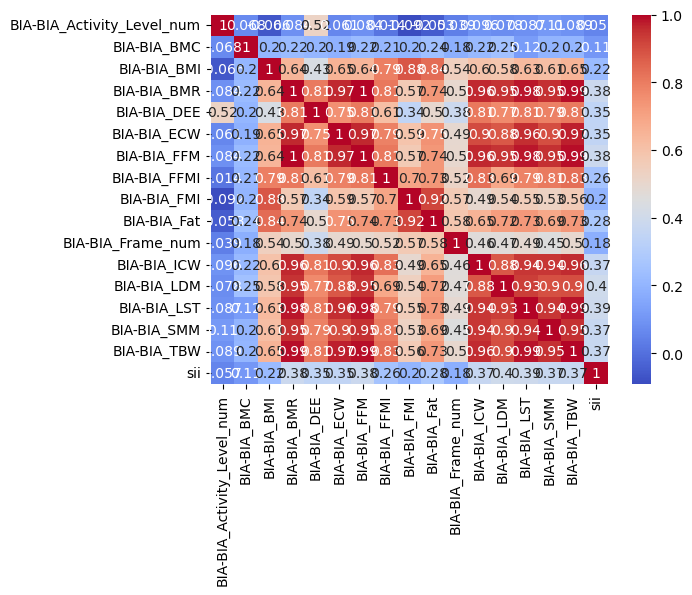

In [80]:
# Checking for Multicollinearity
# Assuming you have a dataframe 'df' with your features
correlation_matrix = bia_df.corr()

# Visualize the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

Don't see any concerning correlation between dependant variables.

### Multiclass Regression

In [81]:
# Run train-test split
# define splits
split = (0.6, 0.2, 0.2)

X_train, y_train, X_val, y_val, X_test, y_test = preprocess_data_part2(
    bia_df.drop('sii', axis=1).to_numpy(),
    bia_df[["sii"]].to_numpy(),
    split
)

print(f"X_train shape {X_train.shape}")
print(f"y_train shape {y_train.shape}")
print(f"X_val shape {X_val.shape}")
print(f"y_val shape {y_val.shape}")
print(f"X_test shape {X_test.shape}")
print(f"y_test shape {y_test.shape}")

X_train shape (1641, 16)
y_train shape (1641, 1)
X_val shape (547, 16)
y_val shape (547, 1)
X_test shape (548, 16)
y_test shape (548, 1)


In [82]:
# Build Model
model = build_model(model="multiclass",X_train=X_train)

# As above, get predictions for the current model first.
preds = model.predict(X_train)

# Do a single gradient update.
history = model.fit(
  x = X_train,
  y = y_train,
  validation_data=(X_val, y_val),
  epochs=50,
  batch_size=10,
  verbose=0)

# Show the loss (before the update) and the new weights.
loss = history.history['loss'][0]
weights = model.layers[0].get_weights()[0].T
print('predictions:\n', preds[:6])
print('loss:', loss)
print('W:\n', weights)

52/52 [==============================] - 0s 237us/step
predictions:
 [[0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]]
loss: 6.229846477508545
W:
 [[1.3276823  0.72624594 0.9232811  1.0507606  1.0215422  1.2041365
  0.86924696 1.4360243  1.1180409  1.038577   1.0266746  0.9714183
  0.70192724 0.8920048  1.0255698  0.9532039 ]
 [1.1405915  0.92674047 1.2122296  1.0212243  1.0222075  1.0384659
  1.1037182  0.81533974 0.7481803  0.9504657  1.2808827  1.0065683
  1.2012787  0.93405396 0.85215694 1.068598  ]
 [0.530869   1.3070886  0.83976585 1.0125226  1.017484   0.661287
  0.98782694 0.8030018  0.93282056 1.066292   0.8517272  1.0550674
  1.0758033  1.244642   0.9795921  1.0172249 ]
 [0.5970132  1.8965997  1.1785374  0.90552026 1.0338451  1.3055122
  1.3601072  0.68793595 1.8774666  1.1567675  0.3445422  1.1088334
  1.394598   1.1579313  1.7520776  1.0601095 ]]


In [83]:
test_preds = model.predict(X_test)
test_preds_labels = np.argmax(test_preds, axis=1)
accuracy = np.mean(test_preds_labels == y_test)
print(f"The accuracy is:{accuracy}")
model.evaluate(x=X_test, y=y_test)

18/18 [==============================] - 0s 305us/step
The accuracy is:0.6040145985401459
18/18 [==============================] - 0s 331us/step - loss: 8.1542


8.154165267944336

### Binary

In [84]:
# Make sii a logistic regression to either refer or not refer a patient
bia_df['sii'] = bia_df['sii'].replace(2.0, 1.0)
bia_df['sii'] = bia_df['sii'].replace(3.0, 1.0)

/var/folders/v0/2007wxh55g36b3q98l1__pyh0000gn/T/ipykernel_38529/2465239090.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bia_df['sii'] = bia_df['sii'].replace(2.0, 1.0)
/var/folders/v0/2007wxh55g36b3q98l1__pyh0000gn/T/ipykernel_38529/2465239090.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bia_df['sii'] = bia_df['sii'].replace(3.0, 1.0)


In [85]:
# Checking the replace worked
bia_df["sii"].value_counts()

sii
0.0    1594
1.0    1142
Name: count, dtype: int64

In [86]:
# Run train-test split
# define splits
split = (0.6, 0.2, 0.2)

X_train, y_train, X_val, y_val, X_test, y_test = preprocess_data_part2(
    bia_df.drop('sii', axis=1).to_numpy(),
    bia_df[["sii"]].to_numpy(),
    split
)

print(f"X_train shape {X_train.shape}")
print(f"y_train shape {y_train.shape}")
print(f"X_val shape {X_val.shape}")
print(f"y_val shape {y_val.shape}")
print(f"X_test shape {X_test.shape}")
print(f"y_test shape {y_test.shape}")

X_train shape (1641, 16)
y_train shape (1641, 1)
X_val shape (547, 16)
y_val shape (547, 1)
X_test shape (548, 16)
y_test shape (548, 1)


In [87]:
# Build Model
model = build_model(model="binary",X_train=X_train)

# As above, get predictions for the current model first.
preds = model.predict(X_train)

# Do a single gradient update.
history = model.fit(
  x = X_train,
  y = y_train,
  validation_data=(X_val, y_val),
  epochs=50,
  batch_size=10,
  verbose=0)

# Show the loss (before the update) and the new weights.
loss = history.history['loss'][0]
weights = model.layers[0].get_weights()[0].T
print('predictions:\n', preds[:6])
print('loss:', loss)
print('W:\n', weights)

52/52 [==============================] - 0s 274us/step
predictions:
 [[1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]]
loss: 4.2844133377075195
W:
 [[1.2677135  0.8288097  0.9245208  1.0189462  0.9984465  1.1602107
  0.8596899  1.3609415  1.180167   1.0173471  0.967622   0.9687762
  0.68772525 0.8941285  1.0400127  0.9421266 ]
 [0.7322886  1.1711817  1.0754794  0.9810563  1.0015521  0.8397952
  1.1403085  0.63905466 0.81982654 0.98265463 1.0323745  1.0312217
  1.3122743  1.1058692  0.9599918  1.057877  ]]


In [88]:
test_preds = model.predict(X_test)
test_preds_labels = np.argmax(test_preds, axis=1)
accuracy = np.mean(test_preds_labels == y_test)
print(f"The accuracy is:{accuracy}")
model.evaluate(x=X_test, y=y_test)

18/18 [==============================] - 0s 296us/step
The accuracy is:0.6040145985401459
18/18 [==============================] - 0s 337us/step - loss: 2.1153


2.115253448486328

## Physical

In [89]:
physical_df = data[col_groups["Physical"]]

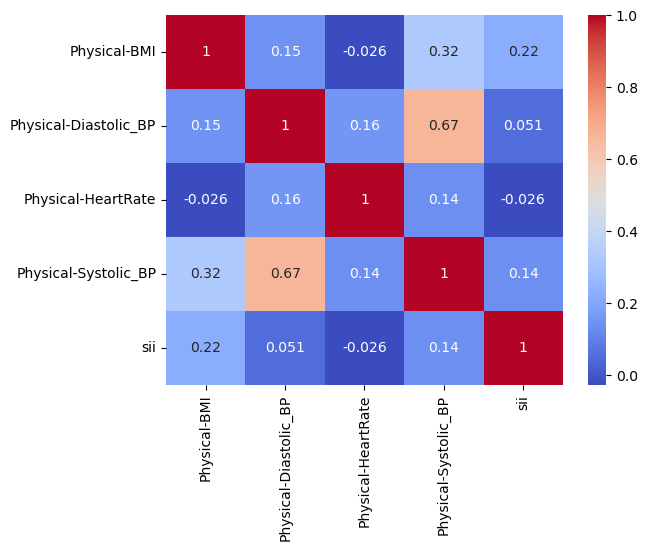

In [90]:
# Checking for Multicollinearity
# Assuming you have a dataframe 'df' with your features
correlation_matrix = physical_df.corr()

# Visualize the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

Don't see any concerning correlation between dependant variables.

### Multiclass Regression

In [91]:
# Run train-test split
# define splits
split = (0.6, 0.2, 0.2)

X_train, y_train, X_val, y_val, X_test, y_test = preprocess_data_part2(
    physical_df.drop('sii', axis=1).to_numpy(),
    physical_df[["sii"]].to_numpy(),
    split
)

print(f"X_train shape {X_train.shape}")
print(f"y_train shape {y_train.shape}")
print(f"X_val shape {X_val.shape}")
print(f"y_val shape {y_val.shape}")
print(f"X_test shape {X_test.shape}")
print(f"y_test shape {y_test.shape}")

X_train shape (1641, 4)
y_train shape (1641, 1)
X_val shape (547, 4)
y_val shape (547, 1)
X_test shape (548, 4)
y_test shape (548, 1)


In [92]:
# Build Model
model = build_model(model="multiclass",X_train=X_train)

# As above, get predictions for the current model first.
preds = model.predict(X_train)

# Do a single gradient update.
history = model.fit(
  x = X_train,
  y = y_train,
  validation_data=(X_val, y_val),
  epochs=50,
  batch_size=10,
  verbose=0)

# Show the loss (before the update) and the new weights.
loss = history.history['loss'][0]
weights = model.layers[0].get_weights()[0].T
print('predictions:\n', preds[:6])
print('loss:', loss)
print('W:\n', weights)

52/52 [==============================] - 0s 268us/step
predictions:
 [[0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]]
loss: 1.2566407918930054
W:
 [[0.96335304 1.0246214  1.0379702  1.0133572 ]
 [1.021183   1.009991   1.0094322  1.0085249 ]
 [1.019666   1.0001097  0.99201417 1.0149277 ]
 [1.2062076  0.9920795  0.93792117 1.0229007 ]]


In [93]:
test_preds = model.predict(X_test)
test_preds_labels = np.argmax(test_preds, axis=1)
accuracy = np.mean(test_preds_labels == y_test)
print(f"The accuracy is:{accuracy}")
model.evaluate(x=X_test, y=y_test)

18/18 [==============================] - 0s 304us/step
The accuracy is:0.5985701156161756
18/18 [==============================] - 0s 385us/step - loss: 1.4256


1.4256325960159302

### Binary

In [94]:
# Make sii a logistic regression to either refer or not refer a patient
physical_df['sii'] = physical_df['sii'].replace(2.0, 1.0)
physical_df['sii'] = physical_df['sii'].replace(3.0, 1.0)

/var/folders/v0/2007wxh55g36b3q98l1__pyh0000gn/T/ipykernel_38529/4063975094.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  physical_df['sii'] = physical_df['sii'].replace(2.0, 1.0)
/var/folders/v0/2007wxh55g36b3q98l1__pyh0000gn/T/ipykernel_38529/4063975094.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  physical_df['sii'] = physical_df['sii'].replace(3.0, 1.0)


In [95]:
# Checking the replace worked
bia_df["sii"].value_counts()

sii
0.0    1594
1.0    1142
Name: count, dtype: int64

In [96]:
# Run train-test split
# define splits
split = (0.6, 0.2, 0.2)

X_train, y_train, X_val, y_val, X_test, y_test = preprocess_data_part2(
    physical_df.drop('sii', axis=1).to_numpy(),
    physical_df[["sii"]].to_numpy(),
    split
)

print(f"X_train shape {X_train.shape}")
print(f"y_train shape {y_train.shape}")
print(f"X_val shape {X_val.shape}")
print(f"y_val shape {y_val.shape}")
print(f"X_test shape {X_test.shape}")
print(f"y_test shape {y_test.shape}")

X_train shape (1641, 4)
y_train shape (1641, 1)
X_val shape (547, 4)
y_val shape (547, 1)
X_test shape (548, 4)
y_test shape (548, 1)


In [97]:
# Build Model
model = build_model(model="binary",X_train=X_train)

# As above, get predictions for the current model first.
preds = model.predict(X_train)

# Do a single gradient update.
history = model.fit(
  x = X_train,
  y = y_train,
  validation_data=(X_val, y_val),
  epochs=50,
  batch_size=10,
  verbose=0)

# Show the loss (before the update) and the new weights.
loss = history.history['loss'][0]
weights = model.layers[0].get_weights()[0].T
print('predictions:\n', preds[:6])
print('loss:', loss)
print('W:\n', weights)

52/52 [==============================] - 0s 262us/step
predictions:
 [[1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]]
loss: 0.8380540609359741
W:
 [[0.96612084 1.0062218  1.01435    0.99698657]
 [1.0338761  0.9937716  0.9856455  1.0030211 ]]


In [98]:
test_preds = model.predict(X_test)
test_preds_labels = np.argmax(test_preds, axis=1)
accuracy = np.mean(test_preds_labels == y_test)
print(f"The accuracy is:{accuracy}")
model.evaluate(x=X_test, y=y_test)

18/18 [==============================] - 0s 302us/step
The accuracy is:0.6040145985401459
18/18 [==============================] - 0s 337us/step - loss: 0.7500


0.7500145435333252

### Functional API to combine info from mult models

Idea: train model for each set of features, then combine the prediction info in a way that is agnostic to missing values.

In [99]:
data.head()

,id,Basic_Demos-Age,Basic_Demos-Sex,CGAS-CGAS_Score,Physical-BMI,Physical-Diastolic_BP,Physical-HeartRate,Physical-Systolic_BP,FGC-FGC_CU,FGC-FGC_PU,...,BIA-BIA_ICW,BIA-BIA_LDM,BIA-BIA_LST,BIA-BIA_SMM,BIA-BIA_TBW,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-computerinternet_hoursday,sii,PAQ
0,00008ff9,5,0,51.000000,16.877316,57.666667,89.666667,113.333333,0.0,0.0,...,24.434900,8.89536,38.9177,19.5413,32.690900,51.333333,71.333333,3.0,2.0,2.730333
1,000fd460,9,0,68.333333,14.035590,75.000000,70.000000,122.000000,3.0,5.0,...,21.035200,14.97400,39.4497,15.4107,27.055200,46.000000,64.000000,0.0,0.0,2.340000
2,00105258,10,1,71.000000,16.648696,65.000000,94.000000,117.000000,20.0,7.0,...,25.600633,13.98280,50.8585,23.5805,40.767467,38.000000,54.000000,2.0,0.0,2.170000
3,00115b9f,9,0,71.000000,18.292347,60.000000,97.000000,117.000000,18.0,5.0,...,30.404100,16.77900,58.9338,26.4798,45.996600,31.000000,45.000000,0.0,1.0,2.451000
4,001f3379,13,1,50.000000,22.279952,60.000000,73.000000,102.000000,12.0,6.0,...,32.914100,20.90200,79.6982,35.3804,63.126500,40.000000,56.000000,0.0,1.0,4.110000


In [128]:
df = data[np.unique(col_groups["Physical"]+col_groups["BIA"])]

In [130]:
X_train, y_train, X_val, y_val, X_test, y_test = preprocess_data_part2(
    df.drop('sii', axis=1).to_numpy(),
    df[["sii"]].to_numpy(),
    split
)

print(f"X_train shape {X_train.shape}")
print(f"y_train shape {y_train.shape}")
print(f"X_val shape {X_val.shape}")
print(f"y_val shape {y_val.shape}")
print(f"X_test shape {X_test.shape}")
print(f"y_test shape {y_test.shape}")

X_train shape (1641, 20)
y_train shape (1641, 1)
X_val shape (547, 20)
y_val shape (547, 1)
X_test shape (548, 20)
y_test shape (548, 1)


Build physical model:

In [146]:
def build_model_fn(learning_rate = 0.01, X_train = np.nan):
    tf.keras.backend.clear_session()
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Dense(
        units=4,                     # output dim
        input_shape=[X_train.shape[1]],             # input dim
        use_bias=False,              # we included the bias in X
        activation='softmax',        # apply a sigmoid to the output
        kernel_initializer=tf.ones_initializer,  # initialize params to 1
    ))
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer)
    return model

In [147]:
# figure out a cleaner way to divide the training features ...
len([col for col in df.columns if 'Physical' in col])

4

In [148]:
model_phys = build_model_fn(X_train=X_train[:,:4])
model_bia = build_model_fn(X_train=X_train[:,4:])

In [149]:
history_phys = model_phys.fit(
  x = X_train[:,:4],
  y = y_train,
  validation_data=(X_val[:,:4], y_val),
  epochs=50,
  batch_size=10,
  verbose=0)

history_bia = model_bia.fit(
  x = X_train[:,4:],
  y = y_train,
  validation_data=(X_val[:,4:], y_val),
  epochs=50,
  batch_size=10,
  verbose=0)

In [166]:
preds_phys = model_phys.predict(X_test[:,:4])
preds_phys

18/18 [==============================] - 0s 344us/step


array([[0.56798446, 0.06071144, 0.01268703, 0.3586171 ],
       [0.5275626 , 0.05145105, 0.008109  , 0.41287726],
       [0.39536798, 0.22905898, 0.27846488, 0.09710814],
       ...,
       [0.5761932 , 0.12010037, 0.04006686, 0.2636395 ],
       [0.56578666, 0.08547316, 0.02132796, 0.32741222],
       [0.44066244, 0.02090142, 0.00141733, 0.5370188 ]], dtype=float32)

In [167]:
tmp_phys = np.log(preds_phys)
tmp_phys -= np.mean(tmp_phys,axis=1).reshape((-1,1))
tmp_phys = np.tanh(tmp_phys)
tmp_phys

array([[ 0.92524964, -0.5452758 , -0.974625  ,  0.82249767],
       [ 0.93376553, -0.56532496, -0.98629904,  0.8940785 ],
       [ 0.5190866 ,  0.02924288,  0.22086339, -0.67988664],
       ...,
       [ 0.8493924 , -0.30420592, -0.8879025 ,  0.4399001 ],
       [ 0.89142096, -0.43107164, -0.951689  ,  0.70732254],
       [ 0.97309655, -0.71674037, -0.9984838 ,  0.9818049 ]],
      dtype=float32)

In [168]:
preds_bia = model_bia.predict(X_test[:,4:])
preds_bia

18/18 [==============================] - 0s 369us/step


array([[1.08173955e-02, 5.62159065e-03, 4.22605395e-01, 5.60955703e-01],
       [9.96573925e-01, 3.12727853e-03, 2.98726896e-04, 7.81784593e-08],
       [9.96784925e-01, 2.48955353e-03, 7.25563499e-04, 1.64390871e-16],
       ...,
       [9.02287841e-01, 9.04358402e-02, 7.27629010e-03, 1.26532058e-13],
       [9.35118973e-01, 6.01608269e-02, 4.72021988e-03, 2.19796514e-09],
       [9.99753296e-01, 2.00999217e-04, 1.87598489e-05, 2.68329095e-05]],
      dtype=float32)

In [169]:
tmp_bia = np.log(preds_bia)
tmp_bia -= np.mean(tmp_bia,axis=1).reshape((-1,1))
tmp_bia = np.tanh(tmp_bia)
tmp_bia

array([[-0.94020426, -0.98349077,  0.95836616,  0.9761556 ],
       [ 0.99999946,  0.94630945, -0.5028864 , -0.99999994],
       [ 1.        ,  0.99999446,  0.9999347 , -1.        ],
       ...,
       [ 0.99999994,  0.99999785,  0.99967265, -1.        ],
       [ 0.9999983 ,  0.99957794,  0.93369514, -1.        ],
       [ 0.9999994 , -0.7745802 , -0.9977894 , -0.99548256]],
      dtype=float32)

In [172]:
preds = tmp_phys + tmp_bia # TODO: use functional API to learn weights here?
preds = np.exp(preds)/np.sum(np.exp(preds),axis=1).reshape((-1,1))

In [180]:
#PHYS accuracy
out = np.argmax(preds_phys, axis=1)
np.mean(out == y_test)

0.5441252863764718

In [181]:
# BIA
out = np.argmax(preds_bia, axis=1)
np.mean(out == y_test)

0.5611047471895146

In [182]:
# COMBINED accuracy
out = np.argmax(preds, axis=1)
np.mean(out == y_test)

0.5772383984229315

In [ ]:
data